# R/Python Refresher

## DSC 630

## Week 1

## Predictive Analytics Assignment Week 1

## David Berberena

## 6/9/2024

# Program Start

I have found a dataset from Kaggle (Bhat, 2021) regarding the consumption of alcohol in various countries in the year 2010. The measure of alcohol consumption within the dataset is the average serving sizes per person, and I am interested to see if a few of the countries that are stereotypically known as those who have avid drinkers actually do back up those claims with the data. With events like St. Patrick's Day for Ireland, Cinco de Mayo for Mexico, and OktoberFest for Germany among others, finding this dataset could reveal which countries actually contain the heaviest drinkers in the world. The two questions that I would like to ask of the data are as follows: 

1. What are the top 10 countries that consume the most alcohol?

2. Which countries are responsible for consuming the most of each type of alcohol: beer, spirits, and wine?

With the dataset that I have acquired, I am well-suited to begin answering these questions with visualizations made from the data. These visual aids will display the dataset in a way that will be easy enough to understand and discern the answers to the above questions. Let's dive in.

## Step 1: Load the Data

In [1]:
# To work with the dataset I have downloaded from Kaggle (Bhat, 2021), I will import the pandas (CSV file reading and data 
# manipulation capabilities) and matplotlib (plotting and graph construction abilities) libraries. 

import pandas as pd
import matplotlib.pyplot as plt

# I will now load the dataset using the pd.read_csv() function and store the dataset contents in a variable.

drinks = pd.read_csv('drinks.csv')

# The head() function will be used to verify that the data has been properly loaded.

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


## Step 2: Verify the Data is Clean

In [3]:
# Before working with the data, I will first check for any missing values and incorrect data types in the dataset using the 
# info() function.

drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


## Step 3: Visualization 1: Histogram/Bar Chart

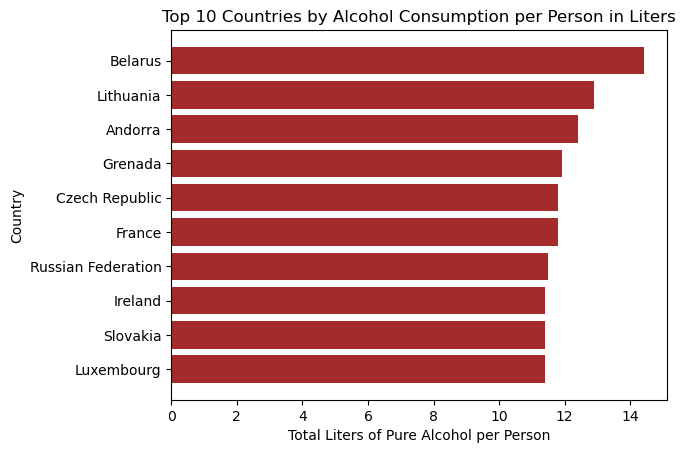

In [5]:
# Now that we have verified that our dataset is clean and there are no complications with the data types, we can begin 
# visualizing. Using matplotlib's barh() function, I will construct a horizontal bar chart showcasing the top 10 countries 
# that consume the most alcohol per person, which the dataset defines as the total_litres_of_pure_alcohol column.

# To begin, I will sort the dataset by the total_litres_of_pure_alcohol variable in descending order, so the dataset will 
# now show the top 10 countries that consume the most pure alcohol first. I will utilize the sort_values() function with the
# ascending argument as False to create the descending order.

sorted_drinks = drinks.sort_values(by = 'total_litres_of_pure_alcohol', ascending = False)

# Next, I am storing the first ten observations of the sorted dataset in a variable using the head() function with 10 as the
# argument.

most_drunk_countries = sorted_drinks.head(10)

# I will craft the horizontal bar chart here by calling the necessary columns from the top 10 observations in the sorted 
# dataset. I will give the bar chart customizations such as bar colors, labels for the axes, and a title. I have also 
# included the gca().invert_yaxis() customization function to ensure that the country with the highest pure alcohol 
# consumption will appear at the top of the chart. This chart should directly answer my first question of the data.

plt.barh(most_drunk_countries['country'], most_drunk_countries['total_litres_of_pure_alcohol'], color = 'brown')
plt.xlabel('Total Liters of Pure Alcohol per Person')
plt.ylabel('Country')
plt.title('Top 10 Countries by Alcohol Consumption per Person in Liters')
plt.gca().invert_yaxis()
plt.show()

## Step 4: Visualization 2: Boxplot

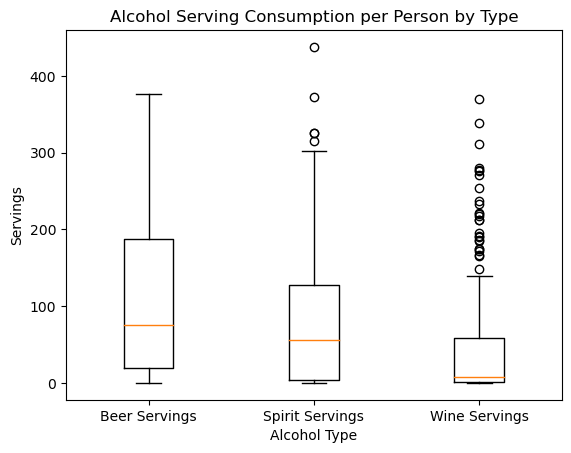

In [6]:
# I am now able to begin gleaning information to answer my second question of the data. I can use a boxplot to showcase the 
# distribution of servings of beer, wine, and spirits spanning all countries within the dataset. Using the boxplot() 
# function, I can craft the boxplot needed here.

plt.boxplot([drinks['beer_servings'], drinks['spirit_servings'], drinks['wine_servings']], labels = ['Beer Servings', 
                                                                                                    'Spirit Servings', 
                                                                                                    'Wine Servings'])
plt.title('Alcohol Serving Consumption per Person by Type')
plt.xlabel('Alcohol Type')
plt.ylabel('Servings')
plt.show()

## Step 5: Visualization 3: Bivariate Plot

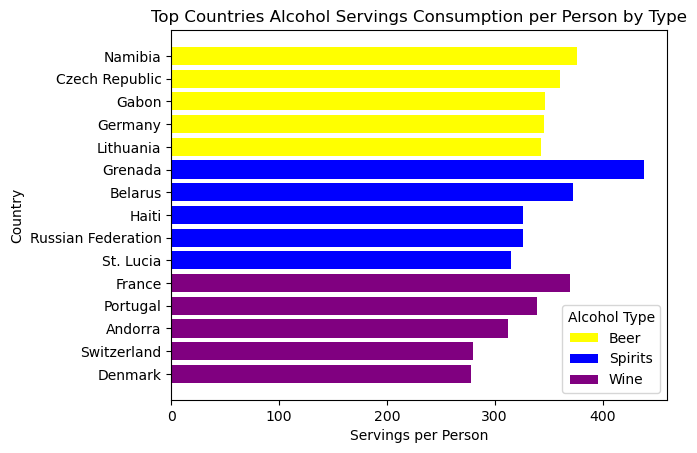

In [20]:
# While the previous visualization allows me to see the number of alcohol servings attributed to the country with the 
# highest consumption of each alcohol type, it does not answer my question of which specific countries they are. So I will 
# create a grouped horizontal bar chart (a bivariate plot) showcasing the top five countries to consume each alcohol type. I
# will employ the same approach I used to craft the first visualization, yet all of the horizontal bar charts will be placed
# onto one plane, making it a bivariate (trivariate to be accurate) plot.

sorted_beer = drinks.sort_values(by = 'beer_servings', ascending = False)
beer_countries = sorted_beer.head(5)

sorted_spirits = drinks.sort_values(by = 'spirit_servings', ascending = False)
spirit_countries = sorted_spirits.head(5)

sorted_wine = drinks.sort_values(by = 'wine_servings', ascending = False)
wine_countries = sorted_wine.head(5)

plt.barh(beer_countries['country'], beer_countries['beer_servings'], label = 'Beer', color ='yellow')
plt.barh(spirit_countries['country'], spirit_countries['spirit_servings'], label = 'Spirits', color = 'blue')
plt.barh(wine_countries['country'], wine_countries['wine_servings'], label = 'Wine', color = 'purple')

plt.ylabel('Country')
plt.xlabel('Servings per Person')
plt.gca().invert_yaxis()
plt.title('Top Countries Alcohol Servings Consumption per Person by Type')
plt.legend(title = 'Alcohol Type')

plt.show()

## Step 6: Summary Analysis and Conclusion

Looking at all three visualizations, I discovered a bit more information than I intended to just trying to answer my two questions of the data. In the first visualization, I directly answered my first question by discovering that Belarus consumed the most liters of pure alcohol in the year 2010. The bar chart was straightforward in providing the solution to that inquiry. The second visualization shared some more information, yet it was not all related to the second question. While the boxplots showed me the highest number of servings consumed by a country in each alcohol category, they also showed that outlier data was present in both the spirits and wine plots. There were very few outliers in the spirits plot, yet many outliers were shown for the wine boxplot, as many points lie above the max value of the boxplot. The final trivariate plot directly answered the second question, showing me the top five countries of each alcohol type with their names and subsequent number of servings per person consumed. The resulting answer here is that Namibia is the country that consumed the most beer, Grenada consumed the most spirits, and France consumed the most wine. 

All in all, the data has shown that most all of the stereotypes we have been lead to believe about countries and alcohol consumption have turned out to be erroneous. The only stereotype that holds up with the data backing it up is that France drinks the most wine. With Germany's OktoberFest, the country takes fourth place for 2010 beer consumption, not quite living up to its hype. Ireland isn't even featured in the top five countries for beer consumption, yet millions flock there to celebrate St. Patrick's Day. In the spirits category, Mexico's supposedly legendary tequila consumption doesn't land the country in the top five, perpetuating the idea that the real truth lies in the data.

## References

Bhat, M. A. (2021, September 12). Alcohol Consumption. Kaggle. https://www.kaggle.com/datasets/mysarahmadbhat/alcohol-consumption 